  <font size=6><b>DSC 522 Ghost Hunting: Finding a Botnet in Netflow Traffic<br>
    <font size=4>Qs.2 a, Qs.3 e,g, Qs.4 and Qs.5 done by John Tomaselli

# Data Cleaning

In [ ]:
# Please note!!!  The group had to expand the RAM available to Jupyter for this code to run. 
# We exapnded the RAM to 4GB and recommend you do the same.  Please see the answer to the below
# stackoverflow page concerning expanding the amount of max_buffer_size. 
# https://stackoverflow.com/questions/57948003/how-to-increase-jupyter-notebook-memory-limit

In [1]:
#Importing packages
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Reading the netflow data. 
df = pd.read_csv(r'capture20110815-3.pcap.netflow_v2.txt', delim_whitespace=True)
df

,Date,flow,start,Durat,Prot,Src,IP,Addr:Port,Dst,IP.1,Addr:Port.1,Flags,Tos,Packets,Bytes,Flows,Label,Labels
0,2011-08-15,17:13:40.449,4.230,TCP,90.177.154.197:20127,->,147.32.84.144:22,PA_,0,180,12628,1,Background,NaN,NaN,NaN,NaN,NaN
1,2011-08-15,17:13:40.449,4.204,TCP,147.32.84.144:22,->,90.177.154.197:20127,PA_,0,329,478578,1,Background,NaN,NaN,NaN,NaN,NaN
2,2011-08-15,17:13:40.453,4.985,TCP,198.36.38.132:55530,->,147.32.86.183:443,PA_,0,94,6212,1,Background,NaN,NaN,NaN,NaN,NaN
3,2011-08-15,17:13:40.456,4.975,UDP,41.103.64.21:54617,->,147.32.86.183:51246,INT,0,182,61555,1,Background,NaN,NaN,NaN,NaN,NaN
4,2011-08-15,17:13:40.456,4.975,TCP,147.32.86.183:443,->,198.36.38.132:55530,PA_,0,185,66524,1,Background,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299085,2011-08-15,19:17:33.765,0.134,TCP,147.32.84.2:80,->,66.194.55.249:43931,SPA_,0,5,3841,1,Background,NaN,NaN,NaN,NaN,NaN
1299086,2011-08-15,19:17:33.811,0.930,TCP,147.32.84.165:1386,->,212.117.171.138:65500,FPA_,0,63,85828,1,Botnet,NaN,NaN,NaN,NaN,NaN
1299087,2011-08-15,19:17:33.811,0.000,TCP,147.32.84.171:43352,->,95.211.93.1:30091,PA_,0,1,71,1,Background,NaN,NaN,NaN,NaN,NaN
1299088,2011-08-15,19:17:33.828,0.000,TCP,95.211.93.1:30091,->,147.32.84.171:43352,A_,0,1,66,1,Background,NaN,NaN,NaN,NaN,NaN


In [3]:
# The below was an extra, hidden column in the data set. 
df.Packets.unique()

array([nan, 'FILTER_LEGITIMATE'], dtype=object)

In [4]:
#Dropping unneccesary columns that only contain NaNs. 
df.drop(['Src','Bytes','Flows','Label','Labels','Flags'],axis=1,inplace = True)

In [5]:
df.head()

,Date,flow,start,Durat,Prot,IP,Addr:Port,Dst,IP.1,Addr:Port.1,Tos,Packets
0,2011-08-15,17:13:40.449,4.230,TCP,90.177.154.197:20127,147.32.84.144:22,PA_,0,180,12628,Background,NaN
1,2011-08-15,17:13:40.449,4.204,TCP,147.32.84.144:22,90.177.154.197:20127,PA_,0,329,478578,Background,NaN
2,2011-08-15,17:13:40.453,4.985,TCP,198.36.38.132:55530,147.32.86.183:443,PA_,0,94,6212,Background,NaN
3,2011-08-15,17:13:40.456,4.975,UDP,41.103.64.21:54617,147.32.86.183:51246,INT,0,182,61555,Background,NaN
4,2011-08-15,17:13:40.456,4.975,TCP,147.32.86.183:443,198.36.38.132:55530,PA_,0,185,66524,Background,NaN


In [6]:
# Splitting the protocol and IP address columns into their respective IPs and Ports. 
df[['a','b']] = df.Prot.str.split(":",n=1,expand=True)
df[['c','d']] = df.IP.str.split(":",n=1,expand=True)

# Droping extra columns to avaoid confusion after splitting.  The values in the protocol and IP address columns remain the
# same while the column headers shift to the right. 
df.drop(['Prot','IP'],axis=1,inplace = True)

In [7]:
df.head()

,Date,flow,start,Durat,Addr:Port,Dst,IP.1,Addr:Port.1,Tos,Packets,a,b,c,d
0,2011-08-15,17:13:40.449,4.230,TCP,PA_,0,180,12628,Background,NaN,90.177.154.197,20127,147.32.84.144,22
1,2011-08-15,17:13:40.449,4.204,TCP,PA_,0,329,478578,Background,NaN,147.32.84.144,22,90.177.154.197,20127
2,2011-08-15,17:13:40.453,4.985,TCP,PA_,0,94,6212,Background,NaN,198.36.38.132,55530,147.32.86.183,443
3,2011-08-15,17:13:40.456,4.975,UDP,INT,0,182,61555,Background,NaN,41.103.64.21,54617,147.32.86.183,51246
4,2011-08-15,17:13:40.456,4.975,TCP,PA_,0,185,66524,Background,NaN,147.32.86.183,443,198.36.38.132,55530


In [8]:
# Renaming the columns using their proper names. 
df.rename(columns = {list(df)[1]:'Flow_Start',list(df)[2]:'Duration',list(df)[3]:'Protocol',list(df)[10]:'Source_IP',list(df)[11]:'Source_Port',
                    list(df)[12]:'Destination_IP',list(df)[13]:'Destination_Port',list(df)[4]:'Flags',list(df)[5]:'Type_of_Service',
                    list(df)[6]:'Packets',list(df)[7]:'Bytes',list(df)[8]:'Labels',list(df)[9]:'Additional_Label'}, inplace = True)

In [9]:
df.head()

,Date,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Labels,Additional_Label,Source_IP,Source_Port,Destination_IP,Destination_Port
0,2011-08-15,17:13:40.449,4.230,TCP,PA_,0,180,12628,Background,NaN,90.177.154.197,20127,147.32.84.144,22
1,2011-08-15,17:13:40.449,4.204,TCP,PA_,0,329,478578,Background,NaN,147.32.84.144,22,90.177.154.197,20127
2,2011-08-15,17:13:40.453,4.985,TCP,PA_,0,94,6212,Background,NaN,198.36.38.132,55530,147.32.86.183,443
3,2011-08-15,17:13:40.456,4.975,UDP,INT,0,182,61555,Background,NaN,41.103.64.21,54617,147.32.86.183,51246
4,2011-08-15,17:13:40.456,4.975,TCP,PA_,0,185,66524,Background,NaN,147.32.86.183,443,198.36.38.132,55530


In [10]:
df.Date.unique() #Looks like all the rows of the DATE column are same so they are dropped. 

array(['2011-08-15'], dtype=object)

In [11]:
df.drop(['Date'],axis=1,inplace = True)

In [12]:
df.head()

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Labels,Additional_Label,Source_IP,Source_Port,Destination_IP,Destination_Port
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,Background,NaN,90.177.154.197,20127,147.32.84.144,22
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,Background,NaN,147.32.84.144,22,90.177.154.197,20127
2,17:13:40.453,4.985,TCP,PA_,0,94,6212,Background,NaN,198.36.38.132,55530,147.32.86.183,443
3,17:13:40.456,4.975,UDP,INT,0,182,61555,Background,NaN,41.103.64.21,54617,147.32.86.183,51246
4,17:13:40.456,4.975,TCP,PA_,0,185,66524,Background,NaN,147.32.86.183,443,198.36.38.132,55530


In [13]:
df.Additional_Label.unique()

array([nan, 'FILTER_LEGITIMATE'], dtype=object)

In [14]:
# Concatenating the labels and the columns with just the 'FILTER_LEGITIMATE' entry.  This creates a 4th entry in the
# Label response variable. 
df['Label'] = df['Labels'].astype(str) + df['Additional_Label'].astype(str)

In [15]:
df.head()

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Labels,Additional_Label,Source_IP,Source_Port,Destination_IP,Destination_Port,Label
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,Background,NaN,90.177.154.197,20127,147.32.84.144,22,Backgroundnan
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,Background,NaN,147.32.84.144,22,90.177.154.197,20127,Backgroundnan
2,17:13:40.453,4.985,TCP,PA_,0,94,6212,Background,NaN,198.36.38.132,55530,147.32.86.183,443,Backgroundnan
3,17:13:40.456,4.975,UDP,INT,0,182,61555,Background,NaN,41.103.64.21,54617,147.32.86.183,51246,Backgroundnan
4,17:13:40.456,4.975,TCP,PA_,0,185,66524,Background,NaN,147.32.86.183,443,198.36.38.132,55530,Backgroundnan


In [16]:
# The 'nan' at the end of each of the below are annoying.  
df.Label.unique() 

array(['Backgroundnan', 'LEGITIMATEnan', 'Botnetnan',
       'BotnetFILTER_LEGITIMATE'], dtype=object)

In [17]:
# Dropping the 'nan' parts. 
df['Label'] = df['Label'].str.replace(r'nan', '')

In [18]:
# Dropping unneccesary columns. 
df.drop(['Labels','Additional_Label'],axis=1,inplace = True)

In [19]:
df.head()

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Source_IP,Source_Port,Destination_IP,Destination_Port,Label
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,90.177.154.197,20127,147.32.84.144,22,Background
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,147.32.84.144,22,90.177.154.197,20127,Background
2,17:13:40.453,4.985,TCP,PA_,0,94,6212,198.36.38.132,55530,147.32.86.183,443,Background
3,17:13:40.456,4.975,UDP,INT,0,182,61555,41.103.64.21,54617,147.32.86.183,51246,Background
4,17:13:40.456,4.975,TCP,PA_,0,185,66524,147.32.86.183,443,198.36.38.132,55530,Background


In [20]:
df.info() #Source_port and destination_port have a few missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299090 entries, 0 to 1299089
Data columns (total 12 columns):
Flow_Start          1299090 non-null object
Duration            1299090 non-null float64
Protocol            1299090 non-null object
Flags               1299090 non-null object
Type_of_Service     1299090 non-null int64
Packets             1299090 non-null int64
Bytes               1299090 non-null int64
Source_IP           1299090 non-null object
Source_Port         1282687 non-null object
Destination_IP      1299090 non-null object
Destination_Port    1281795 non-null object
Label               1299090 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 118.9+ MB


In [21]:
# Only 5 unique TOS.  
df.Type_of_Service.unique() 

array([  0,   3, 192,   2,   1], dtype=int64)

In [22]:
# Total number of observations = 1299090
print(df.groupby('Label').size(), df.groupby('Label').size()/1299090) #Percent of data for each label type

Label
Background                 1218140
Botnet                       21112
BotnetFILTER_LEGITIMATE        648
LEGITIMATE                   59190
dtype: int64 Label
Background                 0.937687
Botnet                     0.016251
BotnetFILTER_LEGITIMATE    0.000499
LEGITIMATE                 0.045563
dtype: float64


In [23]:
df.head()

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Source_IP,Source_Port,Destination_IP,Destination_Port,Label
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,90.177.154.197,20127,147.32.84.144,22,Background
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,147.32.84.144,22,90.177.154.197,20127,Background
2,17:13:40.453,4.985,TCP,PA_,0,94,6212,198.36.38.132,55530,147.32.86.183,443,Background
3,17:13:40.456,4.975,UDP,INT,0,182,61555,41.103.64.21,54617,147.32.86.183,51246,Background
4,17:13:40.456,4.975,TCP,PA_,0,185,66524,147.32.86.183,443,198.36.38.132,55530,Background


In [24]:
df.Flags.unique()

array(['PA_', 'INT', 'A_', 'SA_', 'FSPA_', '_FSPA', 'URP', 'S_', 'RA_',
       'FSRPA_', 'SRPA_', 'FA_', 'SPA_', 'FPA_', 'RED', 'ECR', 'URH',
       'R_', 'FSA_', '_FSA', 'FRA_', '_FSRPA', 'FRPA_', 'SR_', 'ECO',
       'SRA_', 'CON', 'TXD', 'PAC_', 'RPA_', 'NRA', 'URN', 'FSRA_',
       'URFIL', 'NNS', 'FRPAC_', 'URHPRO', '_FSRA', 'FSRPAC_', 'URO',
       'F_', 'FSPAC_', 'RE_', 'FS_', 'FPAC_', 'SPAC_', 'URF', 'FAU_',
       'RPA_FRPA', '_FSPAC', 'RC_', 'FR_', 'FSR_', 'SRC', 'SEC_', 'FAC_',
       'FRAEC_'], dtype=object)

In [25]:
# We will now start one-hot encoding the flags so that they can later be included in our calculations. 
Flags_Copy=df[['Flags']].copy()
import numpy as np
from sklearn.preprocessing import OneHotEncoder
enc_flags = OneHotEncoder(handle_unknown='ignore')
cat_flags_data=np.array(Flags_Copy).reshape(-1, 1)
cat_flags_data

array([['PA_'],
       ['PA_'],
       ['PA_'],
       ...,
       ['PA_'],
       ['A_'],
       ['INT']], dtype=object)

In [26]:
cat_flags_hot=enc_flags.fit_transform(cat_flags_data)
cat_flags=cat_flags_hot.toarray()
cat_flags

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
New_cat_flags = pd.DataFrame(cat_flags)
New_cat_flags.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
enc_flags.get_feature_names()
New_cat_flags.columns = enc_flags.get_feature_names()
New_cat_flags.iloc[:,20:40]
# We know from the original dataframe that the flags for the first 5 rows were PA_, PA_, PA_, INT, and PA_.  This appears
# to match the column names below. 

,x0_FSR_,x0_FS_,x0_F_,x0_INT,x0_NNS,x0_NRA,x0_PAC_,x0_PA_,x0_RA_,x0_RC_,x0_RED,x0_RE_,x0_RPA_,x0_RPA_FRPA,x0_R_,x0_SA_,x0_SEC_,x0_SPAC_,x0_SPA_,x0_SRA_
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1299086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Removing the first 3 characters from each column name. 
New_cat_flags.columns = New_cat_flags.columns.str[3:]
New_cat_flags

,A_,CON,ECO,ECR,FAC_,FAU_,FA_,FPAC_,FPA_,FRAEC_,...,URH,URHPRO,URN,URO,URP,_FSA,_FSPA,_FSPAC,_FSRA,_FSRPA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299088,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Now moving on to one-hot encode the protocol column. 
Protocol_Copy=df[['Protocol']].copy()
import numpy as np
from sklearn.preprocessing import OneHotEncoder
enc_protocol = OneHotEncoder(handle_unknown='ignore')
cat_protocol_data=np.array(Protocol_Copy).reshape(-1, 1)
cat_protocol_data

array([['TCP'],
       ['TCP'],
       ['TCP'],
       ...,
       ['TCP'],
       ['TCP'],
       ['UDP']], dtype=object)

In [31]:
cat_protocol_hot=enc_protocol.fit_transform(cat_protocol_data)
cat_protocol=cat_protocol_hot.toarray()
cat_protocol

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [32]:
New_cat_protocol = pd.DataFrame(cat_protocol)
New_cat_protocol.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
enc_protocol.get_feature_names()
New_cat_protocol.columns = enc_protocol.get_feature_names()
New_cat_protocol.head()

,x0_ARP,x0_ICMP,x0_IGMP,x0_IPV6,x0_IPV6-ICMP,x0_IPX/SPX,x0_PIM,x0_RTCP,x0_RTP,x0_TCP,x0_UDP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
# Removing the first 3 characters from each column name.  Not sure why it does those x0_ characters in front.  
New_cat_protocol.columns = New_cat_protocol.columns.str[3:]
New_cat_protocol

,ARP,ICMP,IGMP,IPV6,IPV6-ICMP,IPX/SPX,PIM,RTCP,RTP,TCP,UDP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1299085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1299086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1299087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1299088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
# Now recreating the geoip2 data. 

#Source country
import pandas as pd
from geolite2 import geolite2

def get_country(ip):
    try:
        df = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return df['country']['names']['en'] if df else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()
# get unique IPs
unique_ips = df['Source_IP'].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
df['country'] = df['Source_IP'].map(unique_ips.apply(get_country))

geolite2.close()

In [36]:
# source city
def get_city(ip):
    try:
        df = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return df['city']['names']['en'] if df else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()
# Getting unique IPs
unique_ips = df['Source_IP'].unique()
# Making a series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# Mapping IP addresses to countries. 
df['city'] = df['Source_IP'].map(unique_ips.apply(get_city))

geolite2.close()

In [37]:
df1=df.rename(columns={list(df)[-2]:'source_country',list(df)[-1]:'source_city'})

In [38]:
df1.head()

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Source_IP,Source_Port,Destination_IP,Destination_Port,Label,source_country,source_city
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,90.177.154.197,20127,147.32.84.144,22,Background,Czechia,NaN
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,147.32.84.144,22,90.177.154.197,20127,Background,Czechia,Prague
2,17:13:40.453,4.985,TCP,PA_,0,94,6212,198.36.38.132,55530,147.32.86.183,443,Background,Saudi Arabia,Dhahran
3,17:13:40.456,4.975,UDP,INT,0,182,61555,41.103.64.21,54617,147.32.86.183,51246,Background,Algeria,Chlef
4,17:13:40.456,4.975,TCP,PA_,0,185,66524,147.32.86.183,443,198.36.38.132,55530,Background,Czechia,Prague


In [39]:
# Destination country
def get_country(ip):
    try:
        df1 = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return df1['country']['names']['en'] if df1 else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()
# get unique IPs
unique_ips = df1['Destination_IP'].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
df1['country'] = df1['Destination_IP'].map(unique_ips.apply(get_country))

geolite2.close()

In [40]:
# Destination city
def get_city(ip):
    try:
        df1 = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return df1['city']['names']['en'] if df1 else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()
# get unique IPs
unique_ips = df1['Destination_IP'].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
df1['city'] = df1['Destination_IP'].map(unique_ips.apply(get_city))

geolite2.close()

In [41]:
df2=df1.rename(columns={'country':'dest_country','city':'dest_city'})

In [42]:
df2.head()

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Source_IP,Source_Port,Destination_IP,Destination_Port,Label,source_country,source_city,dest_country,dest_city
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,90.177.154.197,20127,147.32.84.144,22,Background,Czechia,NaN,Czechia,Prague
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,147.32.84.144,22,90.177.154.197,20127,Background,Czechia,Prague,Czechia,NaN
2,17:13:40.453,4.985,TCP,PA_,0,94,6212,198.36.38.132,55530,147.32.86.183,443,Background,Saudi Arabia,Dhahran,Czechia,Prague
3,17:13:40.456,4.975,UDP,INT,0,182,61555,41.103.64.21,54617,147.32.86.183,51246,Background,Algeria,Chlef,Czechia,Prague
4,17:13:40.456,4.975,TCP,PA_,0,185,66524,147.32.86.183,443,198.36.38.132,55530,Background,Czechia,Prague,Saudi Arabia,Dhahran


In [43]:
df_f=df2.loc[df2['Label'].isin(['Botnet','BotnetFILTER_LEGITIMATE'])]
df_f

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Source_IP,Source_Port,Destination_IP,Destination_Port,Label,source_country,source_city,dest_country,dest_city
4117,17:13:56.723,0.000,TCP,PA_,0,1,263,64.12.175.136,587,147.32.84.165,2243,Botnet,United States,NaN,Czechia,Prague
6269,17:14:06.078,0.000,TCP,FPA_,0,1,66,212.117.171.138,65500,147.32.84.165,2193,Botnet,Luxembourg,NaN,Czechia,Prague
8919,17:14:17.100,2.712,TCP,PA_,0,4,256,94.63.149.150,80,147.32.84.165,1038,Botnet,Portugal,Paços de Ferreira,Czechia,Prague
10127,17:14:22.915,0.000,TCP,PA_,0,1,64,94.63.149.150,80,147.32.84.165,1038,Botnet,Portugal,Paços de Ferreira,Czechia,Prague
11546,17:14:29.123,0.000,TCP,PA_,0,1,64,94.63.149.150,80,147.32.84.165,1038,Botnet,Portugal,Paços de Ferreira,Czechia,Prague
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298957,19:17:32.625,1.322,TCP,S_,0,3,186,147.32.84.165,1439,184.173.217.40,443,Botnet,Czechia,Prague,United States,Dallas
1298978,19:17:32.765,0.000,TCP,S_,0,1,62,147.32.84.165,4281,205.188.103.1,25,Botnet,Czechia,Prague,United States,NaN
1298979,19:17:32.772,1.322,TCP,RA_,0,3,180,184.173.217.40,443,147.32.84.165,1439,Botnet,United States,Dallas,Czechia,Prague
1299031,19:17:33.263,0.000,TCP,S_,0,1,62,147.32.84.165,4284,209.240.204.26,25,Botnet,Czechia,Prague,United States,Redmond


In [44]:
# Displaying the source city and country for Botnet traffic. 
df2['s']=np.where(df2['Label'].isin(['Botnet','BotnetFILTER_LEGITIMATE']), df2['source_city'] , 'not_source')
df2['c']=np.where(df2['Label'].isin(['Botnet','BotnetFILTER_LEGITIMATE']), df2['source_country'] , 'not_source')
df2

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Source_IP,Source_Port,Destination_IP,Destination_Port,Label,source_country,source_city,dest_country,dest_city,s,c
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,90.177.154.197,20127,147.32.84.144,22,Background,Czechia,NaN,Czechia,Prague,not_source,not_source
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,147.32.84.144,22,90.177.154.197,20127,Background,Czechia,Prague,Czechia,NaN,not_source,not_source
2,17:13:40.453,4.985,TCP,PA_,0,94,6212,198.36.38.132,55530,147.32.86.183,443,Background,Saudi Arabia,Dhahran,Czechia,Prague,not_source,not_source
3,17:13:40.456,4.975,UDP,INT,0,182,61555,41.103.64.21,54617,147.32.86.183,51246,Background,Algeria,Chlef,Czechia,Prague,not_source,not_source
4,17:13:40.456,4.975,TCP,PA_,0,185,66524,147.32.86.183,443,198.36.38.132,55530,Background,Czechia,Prague,Saudi Arabia,Dhahran,not_source,not_source
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299085,19:17:33.765,0.134,TCP,SPA_,0,5,3841,147.32.84.2,80,66.194.55.249,43931,Background,Czechia,Prague,United States,Mechanicville,not_source,not_source
1299086,19:17:33.811,0.930,TCP,FPA_,0,63,85828,147.32.84.165,1386,212.117.171.138,65500,Botnet,Czechia,Prague,Luxembourg,NaN,Prague,Czechia
1299087,19:17:33.811,0.000,TCP,PA_,0,1,71,147.32.84.171,43352,95.211.93.1,30091,Background,Czechia,Prague,Netherlands,NaN,not_source,not_source
1299088,19:17:33.828,0.000,TCP,A_,0,1,66,95.211.93.1,30091,147.32.84.171,43352,Background,Netherlands,NaN,Czechia,Prague,not_source,not_source


In [45]:
df_f = df2.loc[df2['Label'].isin(['Botnet','BotnetFILTER_LEGITIMATE'])]

In [46]:
df_f.source_city.isna().sum()

1094

In [47]:
df_f.source_city.nunique()

71

In [48]:
df_f.source_country.nunique()

43

In [49]:
df_f.dest_city.nunique()

374

In [50]:
df_f.dest_country.nunique()

84

In [51]:
# We are only using the source city and country for two reasons.  One, in a botnet attack, the victim is usually 
# disproportionally represented by the destination as UDP packets is not a connection-oriented protocol.  Second, in 
# attacks involving the TCP protocol or other connection-oriented protocols, we would double count the sending and
# receiving locations. 

Src_City_Copy=df2[['s']].copy()

Src_City_Copy=pd.DataFrame(Src_City_Copy).fillna('None')

enc_Src_City = OneHotEncoder(handle_unknown='ignore')
cat_Src_City_data=np.array(Src_City_Copy).reshape(-1, 1)
cat_Src_City_data

array([['not_source'],
       ['not_source'],
       ['not_source'],
       ...,
       ['not_source'],
       ['not_source'],
       ['not_source']], dtype=object)

In [52]:
cat_Src_City_hot=enc_Src_City.fit_transform(cat_Src_City_data)
cat_Src_City=cat_Src_City_hot.toarray()
cat_Src_City

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [53]:
New_cat_Src_City = pd.DataFrame(cat_Src_City)
New_cat_Src_City.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
enc_Src_City.get_feature_names()
New_cat_Src_City.columns = enc_Src_City.get_feature_names()
New_cat_Src_City.head()

,x0_Alameda,x0_Almaty,x0_Amsterdam,x0_Arichuna,x0_Asunción,x0_Bangkok,x0_Bayamón,x0_Beijing,x0_Brest,x0_Budapest,...,x0_Tainan City,x0_Taipei,x0_Taiyuan,x0_Una,x0_Washington,x0_Xuzhou,x0_Zhengzhou,x0_not_source,x0_Épinay-sur-Seine,x0_Ürümqi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
# Removing the first 3 characters from each column name.  I am not sure why it does those x0_ characters in front.  
New_cat_Src_City.columns = New_cat_Src_City.columns.str[3:]
New_cat_Src_City

,Alameda,Almaty,Amsterdam,Arichuna,Asunción,Bangkok,Bayamón,Beijing,Brest,Budapest,...,Tainan City,Taipei,Taiyuan,Una,Washington,Xuzhou,Zhengzhou,not_source,Épinay-sur-Seine,Ürümqi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1299086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1299088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
New_cat_Src_City = New_cat_Src_City.drop(columns=['not_source'],axis=1)

In [57]:
New_cat_Src_City=pd.merge(df2, New_cat_Src_City, right_index=True,left_index=True)

In [58]:
New_cat_Src_City = New_cat_Src_City.drop(columns=['source_country', 'source_city',
       'dest_country', 'dest_city', 's', 'c'],axis=1)

In [59]:
New_cat_Src_City.columns

Index(['Flow_Start', 'Duration', 'Protocol', 'Flags', 'Type_of_Service',
       'Packets', 'Bytes', 'Source_IP', 'Source_Port', 'Destination_IP',
       'Destination_Port', 'Label', 'Alameda', 'Almaty', 'Amsterdam',
       'Arichuna', 'Asunción', 'Bangkok', 'Bayamón', 'Beijing', 'Brest',
       'Budapest', 'Cairo', 'Caracas', 'Casablanca', 'Central', 'Chikmagalūr',
       'Chodzież', 'Dallas', 'Dimitrovgrad', 'Dnipro', 'Ernakulam', 'Gomel',
       'Gomez Palacio', 'Guiyang', 'Harare', 'Hermes', 'Hermosillo', 'Iași',
       'Islamabad', 'Ixtapaluca', 'Karachi', 'Kasur', 'Kharkiv', 'Kiev',
       'Kolkata', 'Kunming', 'Kyoto', 'Lahti', 'Lancaster', 'Lviv', 'Macul',
       'Mancherial', 'Minsk', 'Mogilev', 'Mogoi', 'Moscow', 'Mumbai', 'Murcia',
       'Nagar', 'Nagpur', 'Nanjing', 'New Delhi', 'None', 'Odesa', 'Olsztyn',
       'Paris', 'Paços de Ferreira', 'Port of Spain', 'Prague', 'Quito',
       'Redmond', 'Santa Isabel', 'Shaoxing', 'Sunnyvale', 'Tainan City',
       'Taipei', 'Taiyu

In [60]:
Src_Country_Copy=df2[['c']].copy()

Src_Country_Copy=pd.DataFrame(Src_Country_Copy).fillna('None')

enc_Src_Country = OneHotEncoder(handle_unknown='ignore')
cat_Src_Country_data=np.array(Src_Country_Copy).reshape(-1, 1)
cat_Src_Country_data

array([['not_source'],
       ['not_source'],
       ['not_source'],
       ...,
       ['not_source'],
       ['not_source'],
       ['not_source']], dtype=object)

In [61]:
cat_Src_Country_hot=enc_Src_Country.fit_transform(cat_Src_Country_data)
cat_Src_Country=cat_Src_Country_hot.toarray()
cat_Src_Country

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [62]:
New_cat_Src_Country = pd.DataFrame(cat_Src_Country)
New_cat_Src_Country.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
enc_Src_Country.get_feature_names()
New_cat_Src_Country.columns = enc_Src_Country.get_feature_names()
New_cat_Src_Country.head()

,x0_Austria,x0_Belarus,x0_Bulgaria,x0_Canada,x0_Chile,x0_China,x0_Czechia,x0_Ecuador,x0_Egypt,x0_Finland,...,x0_Trinidad and Tobago,x0_Uganda,x0_Ukraine,x0_United Arab Emirates,x0_United Kingdom,x0_United States,x0_Uzbekistan,x0_Venezuela,x0_Zimbabwe,x0_not_source
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
# Removing the first 3 characters from each column name.  Not sure why it does those x0_ characters in front.  
New_cat_Src_Country.columns = New_cat_Src_Country.columns.str[3:]
New_cat_Src_Country

,Austria,Belarus,Bulgaria,Canada,Chile,China,Czechia,Ecuador,Egypt,Finland,...,Trinidad and Tobago,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Zimbabwe,not_source
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1299086,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1299088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
New_cat_Src_Country = New_cat_Src_Country.drop(columns=['not_source'],axis=1)

In [66]:
New_cat_Src_Country=pd.merge(New_cat_Src_City, New_cat_Src_Country, right_index=True,left_index=True)

In [67]:
New_cat_Src_Country = New_cat_Src_Country.drop(columns=['Flow_Start', 'Duration', 'Protocol', 'Flags', 'Type_of_Service', 'Packets',
 'Bytes', 'Source_IP', 'Source_Port', 'Destination_IP', 'Destination_Port',
 'Label'],axis=1)

In [68]:
print(New_cat_Src_Country.columns.values)

['Alameda' 'Almaty' 'Amsterdam' 'Arichuna' 'Asunción' 'Bangkok' 'Bayamón'
 'Beijing' 'Brest' 'Budapest' 'Cairo' 'Caracas' 'Casablanca' 'Central'
 'Chikmagalūr' 'Chodzież' 'Dallas' 'Dimitrovgrad' 'Dnipro' 'Ernakulam'
 'Gomel' 'Gomez Palacio' 'Guiyang' 'Harare' 'Hermes' 'Hermosillo' 'Iași'
 'Islamabad' 'Ixtapaluca' 'Karachi' 'Kasur' 'Kharkiv' 'Kiev' 'Kolkata'
 'Kunming' 'Kyoto' 'Lahti' 'Lancaster' 'Lviv' 'Macul' 'Mancherial' 'Minsk'
 'Mogilev' 'Mogoi' 'Moscow' 'Mumbai' 'Murcia' 'Nagar' 'Nagpur' 'Nanjing'
 'New Delhi' 'None_x' 'Odesa' 'Olsztyn' 'Paris' 'Paços de Ferreira'
 'Port of Spain' 'Prague' 'Quito' 'Redmond' 'Santa Isabel' 'Shaoxing'
 'Sunnyvale' 'Tainan City' 'Taipei' 'Taiyuan' 'Una' 'Washington' 'Xuzhou'
 'Zhengzhou' 'Épinay-sur-Seine' 'Ürümqi' 'Austria' 'Belarus' 'Bulgaria'
 'Canada' 'Chile' 'China' 'Czechia' 'Ecuador' 'Egypt' 'Finland' 'France'
 'Hong Kong' 'Hungary' 'India' 'Indonesia' 'Iran' 'Japan' 'Kazakhstan'
 'Luxembourg' 'Malaysia' 'Mexico' 'Morocco' 'Netherlands' 'None_

In [69]:
New_cat_Src_Country

,Alameda,Almaty,Amsterdam,Arichuna,Asunción,Bangkok,Bayamón,Beijing,Brest,Budapest,...,Thailand,Trinidad and Tobago,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Zimbabwe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# Combining what we have into one data set.  Note that I am keeping the Flow_Start, Source_IP, and Destination_IP as a 
# network security operator would need those to identify which hosts are infected. 

Interval_Variables = df[['Flow_Start','Source_IP','Destination_IP','Duration','Packets','Bytes']]
Interval_Variables.head()

,Flow_Start,Source_IP,Destination_IP,Duration,Packets,Bytes
0,17:13:40.449,90.177.154.197,147.32.84.144,4.230,180,12628
1,17:13:40.449,147.32.84.144,90.177.154.197,4.204,329,478578
2,17:13:40.453,198.36.38.132,147.32.86.183,4.985,94,6212
3,17:13:40.456,41.103.64.21,147.32.86.183,4.975,182,61555
4,17:13:40.456,147.32.86.183,198.36.38.132,4.975,185,66524


In [71]:
# Exerything_Except_Ports = pd.concat([Interval_Variables, New_cat_flags, New_cat_protocol, New_cat_Src_City, New_cat_Src_Country], axis=1, sort=False)
a = pd.merge(Interval_Variables, New_cat_flags, right_index=True,left_index=True)
b = pd.merge(a, New_cat_protocol, right_index=True,left_index=True)
Exerything_Except_Ports = pd.merge(b, New_cat_Src_Country, right_index=True,left_index=True)

In [72]:
Exerything_Except_Ports

,Flow_Start,Source_IP,Destination_IP,Duration,Packets,Bytes,A_,CON,ECO,ECR,...,Thailand,Trinidad and Tobago,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Zimbabwe
0,17:13:40.449,90.177.154.197,147.32.84.144,4.230,180,12628,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17:13:40.449,147.32.84.144,90.177.154.197,4.204,329,478578,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17:13:40.453,198.36.38.132,147.32.86.183,4.985,94,6212,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17:13:40.456,41.103.64.21,147.32.86.183,4.975,182,61555,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17:13:40.456,147.32.86.183,198.36.38.132,4.975,185,66524,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299085,19:17:33.765,147.32.84.2,66.194.55.249,0.134,5,3841,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299086,19:17:33.811,147.32.84.165,212.117.171.138,0.930,63,85828,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299087,19:17:33.811,147.32.84.171,95.211.93.1,0.000,1,71,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299088,19:17:33.828,95.211.93.1,147.32.84.171,0.000,1,66,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
Target = df.iloc[:,11:12]
Target.rename(columns = {11:'label'}, inplace = True) 
Target.head()

,Label
0,Background
1,Background
2,Background
3,Background
4,Background


In [74]:
# Classifying labels into two categories:
# botnet, botnetfilter_leg = Yes
# Background, legitimate = No
a = ['Botnet', 'BotnetFILTER_LEGITIMATE']
Target['yes/no'] = np.where(Target['Label'].isin(a), 'yes', 'no')

In [75]:
Target.head()

,Label,yes/no
0,Background,no
1,Background,no
2,Background,no
3,Background,no
4,Background,no


In [76]:
# The Labels are not balanced.  We need to resample to have balancd labels because otherwise future classifications will 
# skew heavily in favor of the overweight labels. 
Target['Label'].value_counts()

Background                 1218140
LEGITIMATE                   59190
Botnet                       21112
BotnetFILTER_LEGITIMATE        648
Name: Label, dtype: int64

In [77]:
from sklearn.utils import resample

d = pd.merge(Target, Exerything_Except_Ports, right_index=True, left_index=True)
d.head()

,Label,yes/no,Flow_Start,Source_IP,Destination_IP,Duration,Packets,Bytes,A_,CON,...,Thailand,Trinidad and Tobago,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Zimbabwe
0,Background,no,17:13:40.449,90.177.154.197,147.32.84.144,4.230,180,12628,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Background,no,17:13:40.449,147.32.84.144,90.177.154.197,4.204,329,478578,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Background,no,17:13:40.453,198.36.38.132,147.32.86.183,4.985,94,6212,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Background,no,17:13:40.456,41.103.64.21,147.32.86.183,4.975,182,61555,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Background,no,17:13:40.456,147.32.86.183,198.36.38.132,4.975,185,66524,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# There is a script at the end of this notebook that determines the below ports.  These are well-known ports that appear
# in the dataset.  We want to limit ourselves to the well-known ports in this dataset in order to not employ too many
# one-hot encoded variables. 
imp_ports = ['22', '443', '80', '53', '389', '25', '113', '123', '554', '520', '161', '995', '67', '993', '631', '110',
 '143', '0', '445', '137', '427', '138', '524', '514', '139', '1000', '784', '12', '465', '592', '587', '88', '2', '888', '21',
 '500', '544', '81', '418', '294', '34', '98', '68', '709', '23', '8', '625', '768', '579', '135', '104', '916', '877', '310',
 '490', '1', '82', '369', '1013', '83', '832', '843', '471', '118']

In [79]:
len(imp_ports)

64

In [80]:
# Determining whether a port is in the above set of ports. 
df2['po']=np.where(df2.Destination_Port.isin(imp_ports), df2['Destination_Port'] , 'no')

In [81]:
df2

,Flow_Start,Duration,Protocol,Flags,Type_of_Service,Packets,Bytes,Source_IP,Source_Port,Destination_IP,Destination_Port,Label,source_country,source_city,dest_country,dest_city,s,c,po
0,17:13:40.449,4.230,TCP,PA_,0,180,12628,90.177.154.197,20127,147.32.84.144,22,Background,Czechia,NaN,Czechia,Prague,not_source,not_source,22
1,17:13:40.449,4.204,TCP,PA_,0,329,478578,147.32.84.144,22,90.177.154.197,20127,Background,Czechia,Prague,Czechia,NaN,not_source,not_source,no
2,17:13:40.453,4.985,TCP,PA_,0,94,6212,198.36.38.132,55530,147.32.86.183,443,Background,Saudi Arabia,Dhahran,Czechia,Prague,not_source,not_source,443
3,17:13:40.456,4.975,UDP,INT,0,182,61555,41.103.64.21,54617,147.32.86.183,51246,Background,Algeria,Chlef,Czechia,Prague,not_source,not_source,no
4,17:13:40.456,4.975,TCP,PA_,0,185,66524,147.32.86.183,443,198.36.38.132,55530,Background,Czechia,Prague,Saudi Arabia,Dhahran,not_source,not_source,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299085,19:17:33.765,0.134,TCP,SPA_,0,5,3841,147.32.84.2,80,66.194.55.249,43931,Background,Czechia,Prague,United States,Mechanicville,not_source,not_source,no
1299086,19:17:33.811,0.930,TCP,FPA_,0,63,85828,147.32.84.165,1386,212.117.171.138,65500,Botnet,Czechia,Prague,Luxembourg,NaN,Prague,Czechia,no
1299087,19:17:33.811,0.000,TCP,PA_,0,1,71,147.32.84.171,43352,95.211.93.1,30091,Background,Czechia,Prague,Netherlands,NaN,not_source,not_source,no
1299088,19:17:33.828,0.000,TCP,A_,0,1,66,95.211.93.1,30091,147.32.84.171,43352,Background,Netherlands,NaN,Czechia,Prague,not_source,not_source,no


In [82]:
port=df2[['po']].copy()

port=pd.DataFrame(port).fillna('None')

enc_port = OneHotEncoder(handle_unknown='ignore')
cat_port=np.array(port).reshape(-1, 1)
cat_port

array([['22'],
       ['no'],
       ['443'],
       ...,
       ['no'],
       ['no'],
       ['no']], dtype=object)

In [83]:
cat_port=enc_port.fit_transform(cat_port)
cat_port=cat_port.toarray()
cat_port

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [84]:
New_port = pd.DataFrame(cat_port)
New_port.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
enc_port.get_feature_names()
New_port.columns = enc_port.get_feature_names()
New_port.head()

,x0_0,x0_1,x0_1000,x0_1013,x0_104,x0_110,x0_113,x0_118,x0_12,x0_123,...,x0_832,x0_843,x0_877,x0_88,x0_888,x0_916,x0_98,x0_993,x0_995,x0_no
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [86]:
# Removing the first 3 characters from each column name.  Not sure why it does those x0_ characters in front.  
New_port.columns = New_port.columns.str[3:]
New_port

,0,1,1000,1013,104,110,113,118,12,123,...,832,843,877,88,888,916,98,993,995,no
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1299086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1299087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1299088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
New_port = New_port.drop(columns=['no'],axis=1)

In [88]:
final_X=pd.merge(Exerything_Except_Ports, New_port, right_index=True,left_index=True)

In [89]:
final_X

,Flow_Start,Source_IP,Destination_IP,Duration,Packets,Bytes,A_,CON,ECO,ECR,...,83,832,843,877,88,888,916,98,993,995
0,17:13:40.449,90.177.154.197,147.32.84.144,4.230,180,12628,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17:13:40.449,147.32.84.144,90.177.154.197,4.204,329,478578,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17:13:40.453,198.36.38.132,147.32.86.183,4.985,94,6212,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17:13:40.456,41.103.64.21,147.32.86.183,4.975,182,61555,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17:13:40.456,147.32.86.183,198.36.38.132,4.975,185,66524,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299085,19:17:33.765,147.32.84.2,66.194.55.249,0.134,5,3841,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299086,19:17:33.811,147.32.84.165,212.117.171.138,0.930,63,85828,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299087,19:17:33.811,147.32.84.171,95.211.93.1,0.000,1,71,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1299088,19:17:33.828,95.211.93.1,147.32.84.171,0.000,1,66,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
Labels_and_YN = d[['Label', 'yes/no']]
Labels_and_YN.head()

,Label,yes/no
0,Background,no
1,Background,no
2,Background,no
3,Background,no
4,Background,no


In [91]:
Final_Dataset = pd.merge(Labels_and_YN, final_X, left_index=True, right_index=True)

In [92]:
Final_Dataset.columns.values

array(['Label', 'yes/no', 'Flow_Start', 'Source_IP', 'Destination_IP',
       'Duration', 'Packets', 'Bytes', 'A_', 'CON', 'ECO', 'ECR', 'FAC_',
       'FAU_', 'FA_', 'FPAC_', 'FPA_', 'FRAEC_', 'FRA_', 'FRPAC_',
       'FRPA_', 'FR_', 'FSA_', 'FSPAC_', 'FSPA_', 'FSRA_', 'FSRPAC_',
       'FSRPA_', 'FSR_', 'FS_', 'F_', 'INT', 'NNS', 'NRA', 'PAC_', 'PA_',
       'RA_', 'RC_', 'RED', 'RE_', 'RPA_', 'RPA_FRPA', 'R_', 'SA_',
       'SEC_', 'SPAC_', 'SPA_', 'SRA_', 'SRC', 'SRPA_', 'SR_', 'S_',
       'TXD', 'URF', 'URFIL', 'URH', 'URHPRO', 'URN', 'URO', 'URP',
       '_FSA', '_FSPA', '_FSPAC', '_FSRA', '_FSRPA', 'ARP', 'ICMP',
       'IGMP', 'IPV6', 'IPV6-ICMP', 'IPX/SPX', 'PIM', 'RTCP', 'RTP',
       'TCP', 'UDP', 'Alameda', 'Almaty', 'Amsterdam', 'Arichuna',
       'Asunción', 'Bangkok', 'Bayamón', 'Beijing', 'Brest', 'Budapest',
       'Cairo', 'Caracas', 'Casablanca', 'Central', 'Chikmagalūr',
       'Chodzież', 'Dallas', 'Dimitrovgrad', 'Dnipro', 'Ernakulam',
       'Gomel', 'Gomez Pala

In [93]:
# Separate majority and minority classes.
majority = Final_Dataset.loc[Final_Dataset.Label.isin(['Background', 'LEGITIMATE'])]
minority = Final_Dataset.loc[Final_Dataset.Label.isin(['Botnet', 'BotnetFILTER_LEGITIMATE'])]

In [94]:
# Downsampling the majority class.
df_majority_upsampled = resample(majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=21760,   # to match minority class
                                 random_state=1)    # reproducible results

In [95]:
# Combining the majority class with the downsampled majority class.
downsampled = pd.concat([minority, df_majority_upsampled])

In [96]:
downsampled['Label'].value_counts()

Botnet                     21112
Background                 20745
LEGITIMATE                  1015
BotnetFILTER_LEGITIMATE      648
Name: Label, dtype: int64

In [97]:
y_downsampled = downsampled[['yes/no']]
X_downsampled = downsampled.drop(columns=['Label','yes/no'], axis=1) # Dropping response variables. 

X_downsampled 

,Flow_Start,Source_IP,Destination_IP,Duration,Packets,Bytes,A_,CON,ECO,ECR,...,83,832,843,877,88,888,916,98,993,995
4117,17:13:56.723,64.12.175.136,147.32.84.165,0.000,1,263,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6269,17:14:06.078,212.117.171.138,147.32.84.165,0.000,1,66,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8919,17:14:17.100,94.63.149.150,147.32.84.165,2.712,4,256,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10127,17:14:22.915,94.63.149.150,147.32.84.165,0.000,1,64,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11546,17:14:29.123,94.63.149.150,147.32.84.165,0.000,1,64,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937125,18:37:34.662,213.110.89.63,147.32.84.229,0.000,1,66,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58713,17:18:02.785,147.32.84.229,201.250.104.62,0.000,3,2969,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87402,17:20:15.670,147.32.84.229,107.3.105.226,0.000,1,74,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
877661,18:31:51.521,77.233.5.72,147.32.84.229,0.000,1,80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
y_downsampled.head()

,yes/no
4117,yes
6269,yes
8919,yes
10127,yes
11546,yes


In [99]:
# Dropping the flow start, source IP, and destination IP variables because they cannot contribute to the final regression. 
X_downsampled = X_downsampled.drop(columns=['Flow_Start','Source_IP','Destination_IP'])
X_downsampled.head()

,Duration,Packets,Bytes,A_,CON,ECO,ECR,FAC_,FAU_,FA_,...,83,832,843,877,88,888,916,98,993,995
4117,0.000,1,263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6269,0.000,1,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8919,2.712,4,256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10127,0.000,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11546,0.000,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# There are apparently missing values with the country and city data. 
X_downsampled.isnull().any()

Duration    False
Packets     False
Bytes       False
A_          False
CON         False
            ...  
888         False
916         False
98          False
993         False
995         False
Length: 251, dtype: bool

In [101]:
# Filling in all missing values with 0. 
X_downsampled.fillna(0, inplace=True)

<font size=5><font color='red'>Qs.2.a.	Flags – Do individual flags or sets of flags influence classification?

In [102]:
# There are flags in the below list that are not TCP or UDP flags.
# https://docs.netgate.com/pfsense/en/latest/firewall/tcp-flag-definitions.html
df.Flags.unique()

array(['PA_', 'INT', 'A_', 'SA_', 'FSPA_', '_FSPA', 'URP', 'S_', 'RA_',
       'FSRPA_', 'SRPA_', 'FA_', 'SPA_', 'FPA_', 'RED', 'ECR', 'URH',
       'R_', 'FSA_', '_FSA', 'FRA_', '_FSRPA', 'FRPA_', 'SR_', 'ECO',
       'SRA_', 'CON', 'TXD', 'PAC_', 'RPA_', 'NRA', 'URN', 'FSRA_',
       'URFIL', 'NNS', 'FRPAC_', 'URHPRO', '_FSRA', 'FSRPAC_', 'URO',
       'F_', 'FSPAC_', 'RE_', 'FS_', 'FPAC_', 'SPAC_', 'URF', 'FAU_',
       'RPA_FRPA', '_FSPAC', 'RC_', 'FR_', 'FSR_', 'SRC', 'SEC_', 'FAC_',
       'FRAEC_'], dtype=object)

In [103]:
# I was definitly not expecting the below response.  That is why we have so many weird flags. 
# I am only used to TCP and UDP flags in netflow traffic.  
# Some of these are computer-to-computer traffic, some of these are network infrastructure traffic. 
df.Protocol.unique()

array(['TCP', 'UDP', 'ICMP', 'IGMP', 'ARP', 'PIM', 'IPX/SPX', 'RTCP',
       'IPV6-ICMP', 'IPV6', 'RTP'], dtype=object)

In [104]:
# User Datagram Protocol
Only_UDP_Flags = df[df['Protocol']=='UDP']
Only_UDP_Flags.Flags.unique()

array(['INT'], dtype=object)

In [105]:
print(Only_UDP_Flags.groupby('Label').size())

Label
Background    778216
Botnet          9770
LEGITIMATE      2374
dtype: int64


In [106]:
# Transmission Control Protocol
Only_TCP_Flags = df[df['Protocol']=='TCP']
Only_TCP_Flags.Flags.unique()

array(['PA_', 'A_', 'SA_', 'FSPA_', '_FSPA', 'S_', 'RA_', 'FSRPA_',
       'SRPA_', 'FA_', 'SPA_', 'FPA_', 'R_', 'FSA_', '_FSA', 'FRA_',
       '_FSRPA', 'FRPA_', 'SR_', 'SRA_', 'PAC_', 'RPA_', 'FSRA_',
       'FRPAC_', '_FSRA', 'FSRPAC_', 'F_', 'FSPAC_', 'RE_', 'FS_',
       'FPAC_', 'SPAC_', 'FAU_', 'RPA_FRPA', '_FSPAC', 'RC_', 'FR_',
       'FSR_', 'SEC_', 'FAC_', 'FRAEC_'], dtype=object)

In [107]:
print(Only_TCP_Flags.groupby('Label').size())

Label
Background                 421876
Botnet                      11288
BotnetFILTER_LEGITIMATE       648
LEGITIMATE                  56609
dtype: int64


In [108]:
# Internet Control Message Protocol (ICMP) - an error-reporting protocol network devices like routers use to generate 
# error messages to the source IP address when network problems prevent delivery of IP packets.
# https://tools.ietf.org/html/rfc792
Only_ICMP_Flags = df[df['Protocol']=='ICMP']
Only_ICMP_Flags.Flags.unique()

array(['URP', 'RED', 'ECR', 'URH', 'ECO', 'TXD', 'URN', 'URFIL', 'URHPRO',
       'URO', 'URF', 'SRC'], dtype=object)

In [109]:
print(Only_ICMP_Flags.groupby('Label').size())

Label
Background    12283
Botnet           54
LEGITIMATE      207
dtype: int64


In [110]:
# Internet Group Management Protocol (IGMP) - A communications protocol used by hosts and adjacent routers on IPv4 
# networks to establish multicast group memberships. IGMP is an integral part of IP multicast.
# https://tools.ietf.org/html/rfc3376
Only_IGMP_Flags = df[df['Protocol']=='IGMP']
Only_IGMP_Flags.Flags.unique()

array(['INT'], dtype=object)

In [111]:
print(Only_IGMP_Flags.groupby('Label').size())

Label
Background    607
dtype: int64


In [112]:
# Address Resolution Protocol (ARP) - A communication protocol used for discovering the link layer address, such as a 
# MAC address, associated with a given internet layer address, typically an IPv4 address. 
# This mapping is a critical function in the Internet protocol suite.
# https://www.pcmag.com/encyclopedia/term/arp
Only_ARP_Flags = df[df['Protocol']=='ARP']
Only_ARP_Flags.Flags.unique()

array(['INT', 'CON'], dtype=object)

In [113]:
print(Only_ARP_Flags.groupby('Label').size())

Label
Background    2913
dtype: int64


In [114]:
# Protocol-Independent Multicast (PIM) - A family of multicast routing protocols for Internet Protocol (IP) networks that 
# provide one-to-many and many-to-many distribution of data over a LAN, WAN or the Internet. It is termed protocol-
# independent because PIM does not include its own topology discovery mechanism, but instead uses routing information 
# supplied by other routing protocols.
# http://www.cs.columbia.edu/~hgs/research/projects/multicast/PIM_SM.html
Only_PIM_Flags = df[df['Protocol']=='PIM']
Only_PIM_Flags.Flags.unique()

array(['INT'], dtype=object)

In [115]:
print(Only_PIM_Flags.groupby('Label').size())

Label
Background    337
dtype: int64


In [116]:
# Internetwork Packet Exchange (IPX/SPX) - A network layer protocol in the IPX/SPX protocol suite.  It may act as a 
# transport layer protocol as well.  A big advantage of IPX was a small memory footprint of the IPX driver, which was 
# vital for DOS and Windows up to the version Windows 95 because of limited size of the conventional memory. Another IPX 
# advantage is an easy configuration of the client computers.  
# https://www.linux.org/threads/internetwork-packet-exchange-sequenced-packet-exchange-ipx-spx.9094/
Only_IPX_SPX_Flags = df[df['Protocol']=='IPX/SPX']
Only_IPX_SPX_Flags.Flags.unique()

array(['INT'], dtype=object)

In [117]:
print(Only_IPX_SPX_Flags.groupby('Label').size())

Label
Background    892
dtype: int64


In [118]:
# RTP Control Protocol (RTCP) - A sister protocol of the Real-time Transport Protocol (RTP). Its basic functionality and 
# packet structure is defined in RFC 3550. RTCP provides out-of-band statistics and control information for an RTP session.
# It partners with RTP in the delivery and packaging of multimedia data, but does not transport any media data itself. 
# https://tools.ietf.org/html/rfc3550
Only_RTCP_Flags = df[df['Protocol']=='RTCP']
Only_RTCP_Flags.Flags.unique()

array(['INT'], dtype=object)

In [119]:
print(Only_RTCP_Flags.groupby('Label').size())

Label
Background    927
dtype: int64


In [120]:
# IPV6-ICMP
Only_IPV6_ICMP_Flags = df[df['Protocol']=='IPV6-ICMP']
Only_IPV6_ICMP_Flags.Flags.unique()

array(['NRA', 'NNS'], dtype=object)

In [121]:
print(Only_IPV6_ICMP_Flags.groupby('Label').size())

Label
Background    83
dtype: int64


In [122]:
# IPV6 - The replacement for the current IPV4. 
Only_IPV6_Flags = df[df['Protocol']=='IPV6']
Only_IPV6_Flags.Flags.unique()

array(['INT'], dtype=object)

In [123]:
print(Only_IPV6_Flags.groupby('Label').size())

Label
Background    2
dtype: int64


In [124]:
# RTP - The Real-time Transport Protocol (RTP), defined in RFC 3550, is an IETF standard protocol to enable real-time 
# connectivity for exchanging data that needing high priority and low latency.
# https://developer.mozilla.org/en-US/docs/Web/API/WebRTC_API/Intro_to_RTP
Only_RTP_Flags = df[df['Protocol']=='RTP']
Only_RTP_Flags.Flags.unique()

array(['INT'], dtype=object)

In [125]:
print(Only_RTP_Flags.groupby('Label').size())

Label
Background    4
dtype: int64


In [126]:
# Only TCP, UDP, and ICMP traffic appear to have botnet and legitimate traffic.
# Also note how multiple different types of protocols are using the same flags (i.e., INT, CON, etc.)
# Only the TCP flags can be broken down into meaningful individual letters, but they appear to lose context when broken 
# down.  As such, we are leaving the flags in place without modification. 

<font size=5><font color='red'>3.	Once the final variable set is created, which of the following techniques most effectively classifies or aides in classifying botnet traffic?<br><br>
<font size=4>e.	Gradient Boosting (through XGBoost)<br><br>
g.	Support Vector Machine (SVM)<br><br>


## Gradient Boosting (through XGBoost)

In [127]:
# First using all available variables.  We will later compare with results generated without the source country or city. 
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_downsampled, y_downsampled, test_size=0.3, random_state=0)

In [128]:
# Fitting and transforming the train and the test data to the min max scaler. 
# I chose the min max scalar because I want to maintain the distribution of the data. 
# https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()

scaler_minmax.fit(X_train)
scaler_minmax.fit(X_test)

X_train_MinMaxScaled = scaler_minmax.transform(X_train)
X_test_MinMaxScaled = scaler_minmax.transform(X_test)

In [129]:
# I chose xgboost instead of the GradientBoostingClassifier because xgboost is approximately 10x faster than the
# GradientBoostingClassifier and uses parallel computing. 
# https://analyticsindiamag.com/comparing-the-gradient-boosting-decision-tree-packages-xgboost-vs-lightgbm/
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train_MinMaxScaled, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test_MinMaxScaled)
predictions = y_pred     

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.89%


## Support Vector Machine (SVM)

In [130]:
from sklearn import svm

# SVC = Support Vector Classification.  We are using NuSVC over SVC because the documentation says that NuSVC is
# impractical when used for tens of thousands of samples.  Although we have a smaller dataset here, I am employing NuSVC 
# in case we want to expand the dataset in the future. 
model = svm.NuSVC(kernel='rbf') # rbf = radial basis function.  This is the default, but I am specifying just in case. 
model.fit(X_train_MinMaxScaled, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test_MinMaxScaled)
predictions = y_pred     # replaced [round(value) for value in y_pred] with y_pred

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.82%


In [131]:
# Showing where the demarcation between the protocol variables and the city variables lies. 
X_downsampled.iloc[:,65:75].head()

,IPX/SPX,PIM,RTCP,RTP,TCP,UDP,Alameda,Almaty,Amsterdam,Arichuna
4117,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6269,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8919,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10127,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [132]:
front_side = X_downsampled.iloc[:,0:71]
front_side.head()

,Duration,Packets,Bytes,A_,CON,ECO,ECR,FAC_,FAU_,FA_,...,ICMP,IGMP,IPV6,IPV6-ICMP,IPX/SPX,PIM,RTCP,RTP,TCP,UDP
4117,0.000,1,263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6269,0.000,1,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8919,2.712,4,256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10127,0.000,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11546,0.000,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [133]:
# Showing where the demarcation between the country variables and the port variables lies. 
X_downsampled.iloc[:,180:190].head()

,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Zimbabwe,0,1,1000
4117,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
back_side = X_downsampled.iloc[:,187:]
back_side.head()

,0,1,1000,1013,104,110,113,118,12,123,...,83,832,843,877,88,888,916,98,993,995
4117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Without src city and country

In [135]:
Without_States_Countries = pd.merge(front_side, back_side, right_index=True,left_index=True)
Without_States_Countries.head()

,Duration,Packets,Bytes,A_,CON,ECO,ECR,FAC_,FAU_,FA_,...,83,832,843,877,88,888,916,98,993,995
4117,0.000,1,263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6269,0.000,1,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8919,2.712,4,256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10127,0.000,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11546,0.000,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
X_Without_States_Countries = Without_States_Countries
y_Without_States_Countries = y_downsampled

## Gradient Boosting (through XGBoost)

In [152]:
# First using all available variables.  We will later compare with results generated without the source country or city. 
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Without_States_Countries, y_Without_States_Countries, 
                                                    test_size=0.3, random_state=0)

In [153]:
# Fitting and transforming the train and the test data to the min max scaler. 
# I chose the min max scalar because I want to maintain the distribution of the data. 
# https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()

scaler_minmax.fit(X_train)
scaler_minmax.fit(X_test)

X_train_MinMaxScaled = scaler_minmax.transform(X_train)
X_test_MinMaxScaled = scaler_minmax.transform(X_test)

In [154]:
# I chose xgboost instead of the GradientBoostingClassifier because xgboost is approximately 10x faster than the
# GradientBoostingClassifier and uses parallel computing. 
# https://analyticsindiamag.com/comparing-the-gradient-boosting-decision-tree-packages-xgboost-vs-lightgbm/
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train_MinMaxScaled, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test_MinMaxScaled)
predictions = y_pred     

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.86%


## Support Vector Machine (SVM)

In [155]:
from sklearn import svm

# SVC = Support Vector Classification.  We are using NuSVC over SVC because the documentation says that NuSVC is
# impractical when used for tens of thousands of samples.  Although we have a smaller dataset here, I am employing NuSVC 
# in case we want to expand the dataset in the future. 
model = svm.NuSVC(kernel='rbf') # rbf = radial basis function.  This is the default, but I am specifying just in case. 
model.fit(X_train_MinMaxScaled, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test_MinMaxScaled)
predictions = y_pred     # replaced [round(value) for value in y_pred] with y_pred

# Evaluating predictions for the test data. 
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.91%


<font size=5><font color='red'>4.	Which of the variables in the final dataset proved to be most important?  Least important?  Use dominance analysis to determine.

In [156]:
# Dominance Analysis is used to determine the relative importance of one predictor over other predictors in multiple 
# regressions. 
from dominance_analysis import Dominance_Datasets
from dominance_analysis import Dominance

Loading BokehJS ...

In [157]:
# Dominance Analysis wants the target variable in the dataset, not as a seperate dataframe. 
dsampled_data = pd.merge(X_downsampled, y_downsampled, left_index=True, right_index=True)
dsampled_data.head()

,Duration,Packets,Bytes,A_,CON,ECO,ECR,FAC_,FAU_,FA_,...,832,843,877,88,888,916,98,993,995,yes/no
4117,0.000,1,263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes
6269,0.000,1,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes
8919,2.712,4,256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes
10127,0.000,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes
11546,0.000,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes


In [158]:
dsampled_data['yes/no'].unique()

array(['yes', 'no'], dtype=object)

In [159]:
# We need to change the column title here, otherwise will get an error when running the dominance_regression function. 
dsampled_data = dsampled_data.rename(columns={"yes/no": "Botnet"})

In [160]:
# Turning the response variable into a boolean for use. 
dsampled_data['Botnet'] = dsampled_data['Botnet'].replace({'yes': True, 'no': False})
dsampled_data

,Duration,Packets,Bytes,A_,CON,ECO,ECR,FAC_,FAU_,FA_,...,832,843,877,88,888,916,98,993,995,Botnet
4117,0.000,1,263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
6269,0.000,1,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
8919,2.712,4,256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
10127,0.000,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
11546,0.000,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937125,0.000,1,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
58713,0.000,3,2969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
87402,0.000,1,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
877661,0.000,1,80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [161]:
# Notice the high R-Squared value of 98.26%. 
dominance_regression=Dominance(data=dsampled_data,target='Botnet')

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['Duration', 'INT', 'PA_', 'RA_', 'S_', 'TCP', 'UDP', 'Dallas', 'None_x', 'Prague', 'Czechia', 'United States', '25', '53', '80']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.9826477565796212



In [162]:
incr_variable_rsquare=dominance_regression.incremental_rsquare()

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['Duration', 'INT', 'PA_', 'RA_', 'S_', 'TCP', 'UDP', 'Dallas', 'None_x', 'Prague', 'Czechia', 'United States', '25', '53', '80']

Creating models for 32767 possible combinations of 15 features :


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [07:33<00:00, 30.20s/it]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [04:48<00:00, 20.63s/it]


#########################  Variable Dominance Calculation Done!!!!!  #########################



In [163]:
# Notice how profound the relative importance of Prague and Czechia are in the below pie chart.  They make up approximately
# 70% of the relative importance. 
dominance_regression.plot_incremental_rsquare()

In [1]:
# In case you cannot see the above relative importance bar chart, pie chart, and waterfall, I am manually including the 
# images below. There is a bug with the dominance_analysis library.  The above images were rendered using SciKit Leanr 
# v0.22.2, not v0.19.2.  As such, they may not render on computers running SciKit Learn v0.19.2.

<img src="Relative_Importance_Bar_Chart_All_Variables.png" width=1000 height=200>

<img src="Relative_Importance_Pie_Chart_All_Variables.png" width=1000 height=200>

<img src="Relative_Importance_Waterfall_All_Variables.png" width=1000 height=200>

In [164]:
# The most prominent locations (Prague, Czechia) accounts for 70% of the relative importance. 
dominance_regression.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
Prague,0.000173364,0.796491,0.344438,0.351624,35.7833
Czechia,9.02926e-08,0.79664,0.344425,0.351611,35.782
None_x,0.0688226,0.0257861,0.060895,0.0590826,6.01259
S_,1.56289e-05,0.20777,0.046707,0.0543321,5.52915
25,3.48668e-08,0.157271,0.028667,0.0353292,3.5953
United States,6.98704e-05,0.0312796,0.021590,0.0208014,2.11687
PA_,3.69213e-06,0.0595586,0.017721,0.0193287,1.967
Dallas,0.00252789,0.0269722,0.019429,0.0188055,1.91376
53,1.5127e-06,0.0281776,0.018679,0.0180675,1.83865
RA_,0.00278111,0.0238535,0.018438,0.0177556,1.80691


In [165]:
# We are now testing the relative importance without Prague and Czechia. 
dsampled_data_WO_Prague_Czecha = dsampled_data.drop(['Prague','Czechia'], axis=1)
dsampled_data_WO_Prague_Czecha.head()

,Duration,Packets,Bytes,A_,CON,ECO,ECR,FAC_,FAU_,FA_,...,832,843,877,88,888,916,98,993,995,Botnet
4117,0.000,1,263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
6269,0.000,1,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
8919,2.712,4,256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
10127,0.000,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
11546,0.000,1,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [166]:
# Notice that when Prague and Czechia are dropped, the top selected predictors change from what we saw previously in the 
# 3rd, 4th, 5th, etc. spots.  Also notice that the R-Squared drops to 41.53%.  
dominance_regression=Dominance(data=dsampled_data_WO_Prague_Czecha,target='Botnet')

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['Duration', 'A_', 'INT', 'PA_', 'RA_', 'S_', 'TCP', 'UDP', 'Dallas', 'None_x', 'Luxembourg', 'United States', '25', '53', '80']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.4153356165872567



In [167]:
incr_variable_rsquare=dominance_regression.incremental_rsquare()

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['Duration', 'A_', 'INT', 'PA_', 'RA_', 'S_', 'TCP', 'UDP', 'Dallas', 'None_x', 'Luxembourg', 'United States', '25', '53', '80']

Creating models for 32767 possible combinations of 15 features :


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [07:53<00:00, 31.58s/it]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [05:02<00:00, 21.59s/it]


#########################  Variable Dominance Calculation Done!!!!!  #########################



In [168]:
# Notice how the distribution of relative importance is much less concentrated than before.  Also notice how more technical
# indicators, such as SYN (S_) and ports, are more prominant. 
dominance_regression.plot_incremental_rsquare()

In [ ]:
# In case you cannot see the above relative importance bar chart, pie chart, and waterfall, I am manually including the 
# images below. There is a bug with the dominance_analysis library.  The above images were rendered using SciKit Leanr 
# v0.22.2, not v0.19.2.  As such, they may not render on computers running SciKit Learn v0.19.2. 

<img src="Relative_Importance_Bar_Chart_WO_City_Country.png" width=1000 height=200>

<img src="Relative_Importance_Pie_Chart_WO_City_Country.png" width=1000 height=200>

<img src="Relative_Importance_Waterfall_WO_City_Country.png" width=1000 height=200>

In [169]:
dominance_regression.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
S_,0.0337228,0.20777,0.112612,0.113696,27.3746
25,0.000968924,0.157271,0.059712,0.0622997,14.9998
53,0.0676842,0.0281776,0.064024,0.0618781,14.8983
PA_,0.0129373,0.0595586,0.044528,0.0434242,10.4552
80,0.00764158,0.0343153,0.021028,0.021021,5.06122
None_x,0.00236778,0.0257861,0.017707,0.0172234,4.14686
A_,0.00622813,0.020924,0.014231,0.0141436,3.40535
Luxembourg,7.10631e-05,0.0201833,0.013743,0.0132611,3.19286
United States,2.91744e-05,0.0312796,0.011997,0.0124849,3.00599
TCP,0.0012071,0.0316881,0.010494,0.0112875,2.71768


# Question 5 

In [137]:
# Reference: The following code is a modified version of code found at 
# https://www.kaggle.com/kmader/active-learning-optimization-improvement
# Attempts to use the superintendant Python library (https://pypi.org/project/superintendent/)
# and a few other code examples did not yield the necessary results. 

#Importing packages
import pandas as pd
import warnings
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for nicer factor plots
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [169]:
df=pd.merge(X_downsampled[['Duration','Bytes']], y_downsampled, left_index=True, right_index=True)
df

,Duration,Bytes,yes/no
4117,0.000,263,yes
6269,0.000,66,yes
8919,2.712,256,yes
10127,0.000,64,yes
11546,0.000,64,yes
...,...,...,...
937125,0.000,66,no
58713,0.000,2969,no
87402,0.000,74,no
877661,0.000,80,no


In [171]:
df = df.reset_index()
df = df.drop(['index'], axis=1)
df = df.rename(columns={'yes/no':'Botnet'})
df.head()

,Duration,Bytes,Botnet
0,0.000,263,yes
1,0.000,66,yes
2,2.712,256,yes
3,0.000,64,yes
4,0.000,64,yes


In [172]:
# Fitting and transforming the train and the test data to the min max scaler. 
# I chose the min max scalar because I want to maintain the distribution of the data. 
# https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

from sklearn.preprocessing import MinMaxScaler

df[['Duration', 'Bytes']] = scaler_minmax.fit_transform(df[['Duration', 'Bytes']])

In [173]:
df.head()

,Duration,Bytes,Botnet
0,0.000000,3.038905e-05,yes
1,0.000000,8.981985e-07,yes
2,0.540239,2.934115e-05,yes
3,0.000000,5.987990e-07,yes
4,0.000000,5.987990e-07,yes


In [182]:
df['Botnet'].value_counts()

yes    21760
no     21760
Name: Botnet, dtype: int64

In [174]:
def tasty_papaya_func(Duration_Dummy, Bytes_Dummy):
    r_dist = np.sqrt(np.square(Duration_Dummy)+np.square(Bytes_Dummy))
    return (r_dist<0.65) & (r_dist>0.45)

In [183]:
allsamples_df = pd.DataFrame(dict(duration = df['Duration'], 
                  bytes = df['Bytes'], 
                  botnet = tasty_papaya_func(df['Duration'], df['Bytes'])))
# 430 was chosen as the number for the sample because the downsampled dataset contained approximately 43,000 entries. 
# 430 is 1% of the total, as specified in the question. 
train_df = allsamples_df.sample(430, random_state=0)

In [184]:
train_df

,duration,bytes,botnet
35688,0.000000,5.838290e-06,False
14999,0.000000,4.026923e-05,False
9017,0.589044,9.580784e-06,True
882,0.445219,2.309867e-04,False
15789,0.000000,2.993995e-07,False
...,...,...,...
11416,0.000000,1.646697e-06,False
13266,0.598406,9.580784e-06,True
10291,0.239243,1.886217e-05,False
40911,0.000000,2.694595e-06,False


In [186]:
train_df['botnet'].value_counts()

False    386
True      44
Name: botnet, dtype: int64

,duration,bytes,botnet
35688,0.000000,5.838290e-06,False
14999,0.000000,4.026923e-05,False
9017,0.589044,9.580784e-06,True
882,0.445219,2.309867e-04,False
15789,0.000000,2.993995e-07,False
35805,0.440637,5.464041e-04,False
13608,0.000000,2.993995e-07,False
1604,0.000000,4.595782e-05,False
12785,0.000000,8.981985e-07,False
5709,0.000000,2.993995e-07,False


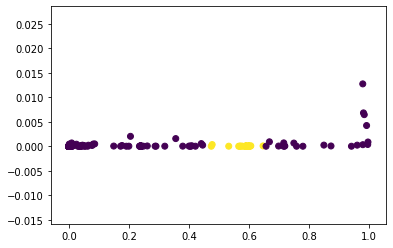

In [187]:
plt.scatter(train_df['duration'], train_df['bytes'], c = train_df['botnet'])
train_df.head(10)

<font size=5><font color='red'>5.	Once the previous questions are answered, attempt to use active learning with the dataset.  Employ 1% of the available data with 0.5% of the data (one half the 1%) initially tagged for training and 0.5% of the data (the second half of the 1%) to improve the initial model. 

In [209]:
from sklearn.svm import SVC
simple_svm = SVC(kernel = 'rbf', probability=True)
simple_svm.fit(train_df[['duration', 'bytes']], train_df['botnet'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

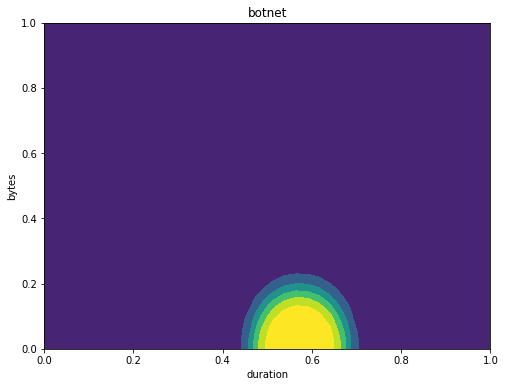

In [210]:
src_xx, source_yy = np.meshgrid(np.linspace(0,1,40), np.linspace(0,1,40))
srccountry_x, sourcebytes_y = [x.ravel() for x in [src_xx, source_yy]]
fig, ax1 = plt.subplots(1,1, figsize = (8,6))
ax1.contourf(src_xx[0,:], source_yy[:,0], 
             simple_svm.predict_proba(np.stack([srccountry_x, sourcebytes_y],-1))[:,1].reshape(src_xx.shape), 
             cmap = 'viridis',
            vmin = 0,
            vmax = 0.75)

ax1.set_xlabel('duration')
ax1.set_ylabel('bytes')
ax1.set_title('botnet');

In [211]:
from sklearn.metrics import accuracy_score
botnet_z = tasty_papaya_func(srccountry_x, sourcebytes_y)
def fit_and_show_model(model, 
                       cur_df, 
                       ax = None, 
                       title_str = 'Botnet',
                       fit_model = True
                      ):
    if fit_model:
        model.fit(cur_df[['duration', 'bytes']], cur_df['botnet'])
    pred_y_proba = model.predict_proba(np.stack([srccountry_x, sourcebytes_y],-1))[:,1]
    model_accuracy = accuracy_score(botnet_z, pred_y_proba>0.5)
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize = (8,6))
    ax.contourf(src_xx[0,:], source_yy[:,0], 
             pred_y_proba.reshape(src_xx.shape), 
             cmap = 'viridis',
            vmin = 0,
            vmax = 0.75)
    ax.set_xlabel('Duration')
    ax.set_ylabel('Bytes')
    ax.set_title('%s, Accuracy %2.1f%%' % (title_str, 100*model_accuracy));
    return model, model_accuracy

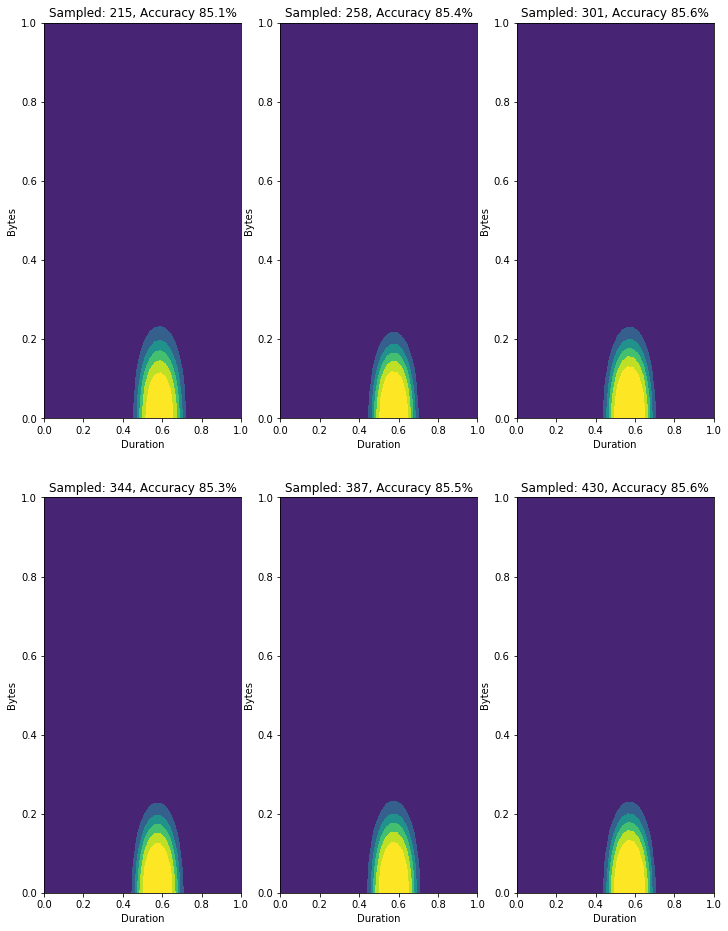

In [212]:
fig, m_axs = plt.subplots(2, 3, figsize = (12, 16))
# As specified in question 5, 0.5% of the data (215 observations) is tagged for initial training with the following
# 215 observations, the second 0.5% of the observations, used to improve the model over 6 steps. 
# This is expressed in the below np.linspace(215, 430, 6) code segment. 
for c_ax, c_pts in zip(m_axs.flatten(), np.linspace(215, 430, 6).astype(int)):
    cur_svm = SVC(kernel = 'rbf', probability=True, random_state=0)
    fit_and_show_model(cur_svm, 
                       allsamples_df.sample(c_pts, random_state=0), 
                       title_str = 'Sampled: {}'.format(c_pts),
                       ax = c_ax)

In [213]:
# initializing the learner
from modAL.models import ActiveLearner
# The initial dataframe is set to 215 observations, 0.5% of the dataset. 
initial_df = allsamples_df.sample(215, random_state=0)
learner = ActiveLearner(
    estimator=SVC(kernel = 'rbf', probability=True, random_state = 2018),
    X_training=initial_df[['duration', 'bytes']], 
    y_training=initial_df['botnet']
)
# query for labels
X_pool = allsamples_df[['duration', 'bytes']].values
y_pool = allsamples_df['botnet'].values
query_idx, query_inst = learner.query(X_pool)
query_idx, query_inst

(array([29115], dtype=int64), array([[6.80677291e-01, 2.60477560e-05]]))

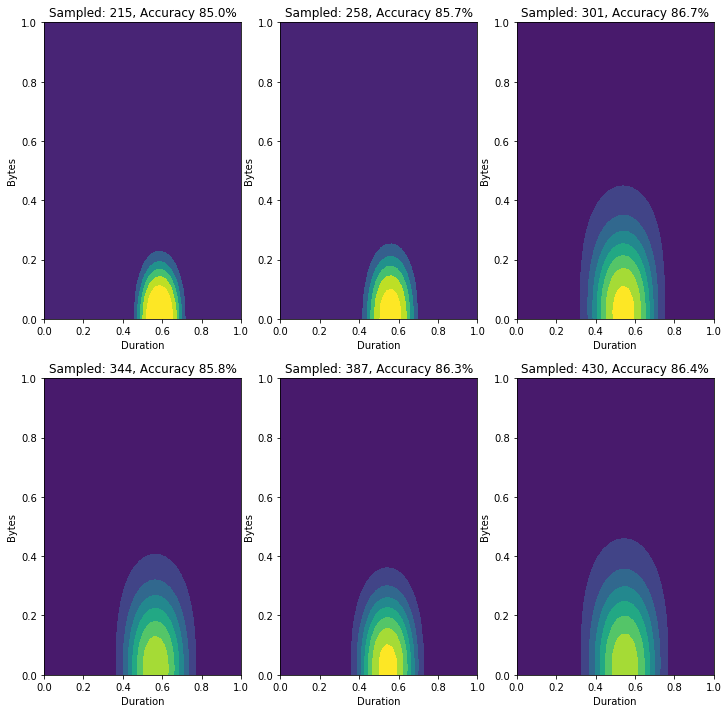

In [214]:
fig, m_axs = plt.subplots(2, 3, figsize = (12, 12))
last_pts = initial_df.shape[0]
queried_pts = []
# As specified in question 5, 0.5% of the data (215 observations) is tagged for initial training with the following
# 215 observations, the second 0.5% of the observations, used to improve the model over 6 steps. 
# This is expressed in the below np.linspace(215, 430, 6) code segment. 
for c_ax, c_pts in zip(m_axs.flatten(), np.linspace(215, 430, 6).astype(int)):
    for _ in range(c_pts-last_pts):
        query_idx, _ = learner.query(X_pool)
        queried_pts += [query_idx]
        learner.teach(X_pool[query_idx], y_pool[query_idx])
    last_pts = c_pts
    fit_and_show_model(learner, 
                       None, 
                       title_str = 'Sampled: {}'.format(c_pts),
                       ax = c_ax,
                       fit_model = False
                      )


## Question 5 with Random Forest

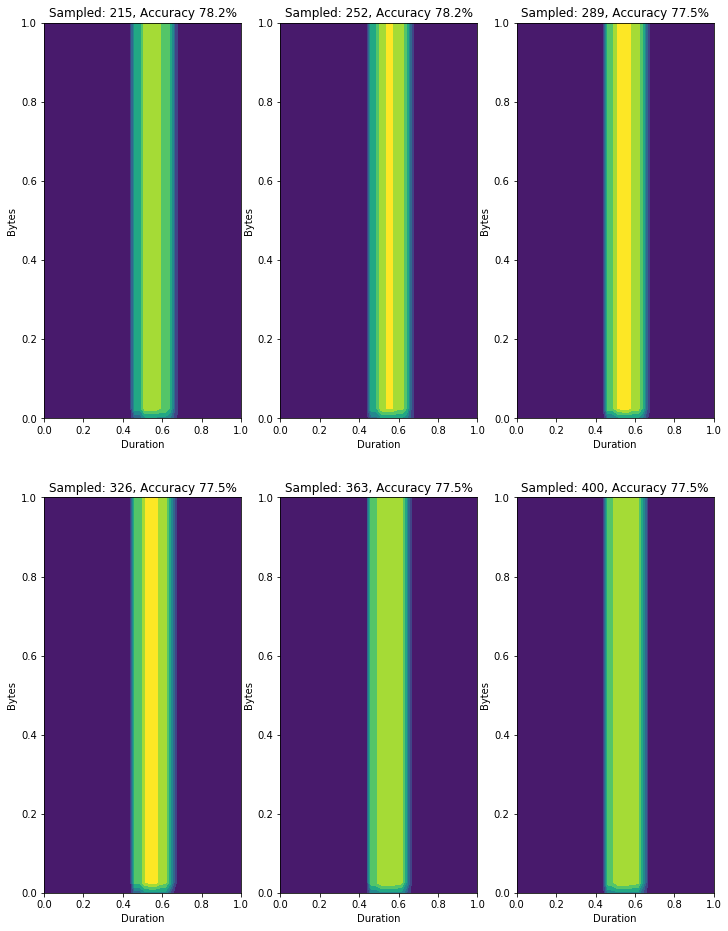

In [215]:
from sklearn.ensemble import RandomForestClassifier
fig, m_axs = plt.subplots(2, 3, figsize = (12, 16))
# As specified in question 5, 0.5% of the data (215 observations) is tagged for initial training with the following
# 215 observations, the second 0.5% of the observations, used to improve the model over 6 steps. 
# This is expressed in the below np.linspace(215, 430, 6) code segment. 
for c_ax, c_pts in zip(m_axs.flatten(), np.linspace(215, 400, 6).astype(int)):
    cur_rf = RandomForestClassifier(random_state = 0)
    fit_and_show_model(cur_rf, 
                       allsamples_df.sample(c_pts, random_state=0), 
                       title_str = 'Sampled: {}'.format(c_pts),
                       ax = c_ax)

In [216]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(random_state=0),
    X_training=initial_df[['duration', 'bytes']], 
    y_training=initial_df['botnet']
)
query_idx, query_inst = learner.query(X_pool)
query_idx, query_inst

(array([30785], dtype=int64), array([[4.93625498e-01, 4.49099242e-05]]))

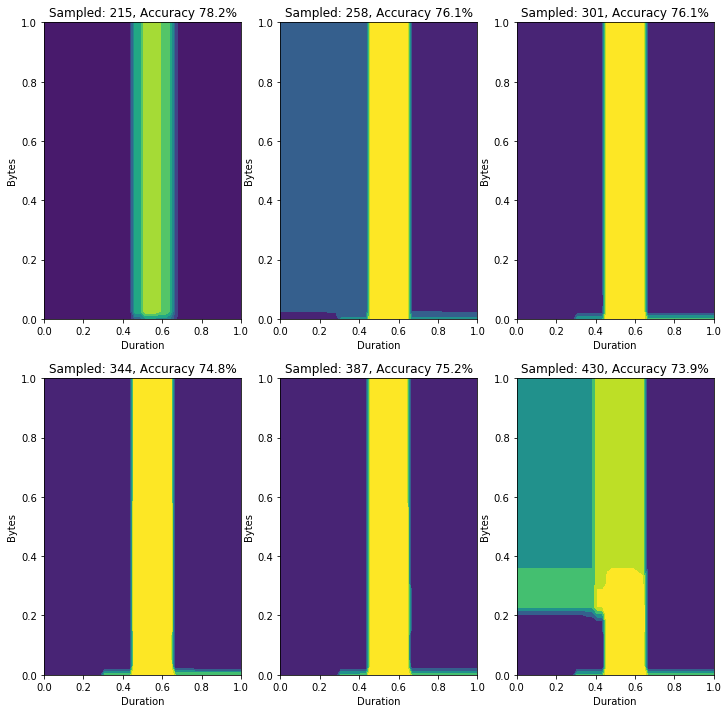

In [217]:
fig, m_axs = plt.subplots(2, 3, figsize = (12, 12))
last_pts = initial_df.shape[0]
queried_pts = []
# As specified in question 5, 0.5% of the data (215 observations) is tagged for initial training with the following
# 215 observations, the second 0.5% of the observations, used to improve the model over 6 steps. 
# This is expressed in the below np.linspace(215, 430, 6) code segment. 
for c_ax, c_pts in zip(m_axs.flatten(), np.linspace(215, 430, 6).astype(int)):
    for _ in range(c_pts-last_pts):
        query_idx, _ = learner.query(X_pool)
        queried_pts += [query_idx]
        learner.teach(X_pool[query_idx], y_pool[query_idx])
    last_pts = c_pts
    fit_and_show_model(learner, 
                       None, 
                       title_str = 'Sampled: {}'.format(c_pts),
                       ax = c_ax,
                       fit_model = False
                      )

## Question 5 Running a Full Experiment

In [218]:
#srccountry_x, sourcebytes_y
def run_full_experiment(create_model_func,
                        data_df,
                        initial_pts,
                        sample_counts,
                        random_state,
                       n_instances=1):
    for i in range(215):
        initial_df = data_df.sample(initial_pts, random_state=random_state+1000*i)
        # ensure there is at least one positive case
        if initial_df['botnet'].max():
            break
    learner = ActiveLearner(
        estimator=create_model_func(),
        X_training=initial_df[['duration', 'bytes']], 
        y_training=initial_df['botnet']
    )
    X_pool = data_df[['duration', 'bytes']].values
    y_pool = data_df['botnet'].values
    last_pts = initial_df.shape[0]
    results_list = []
    for c_pts in [x for x in sample_counts if x>=initial_pts]:
        for _ in range(0, c_pts-last_pts, n_instances):
            query_idx, _ = learner.query(X_pool, n_instances = n_instances)
            learner.teach(X_pool[query_idx], y_pool[query_idx])
        last_pts = c_pts
        
        try:
            pred_y_proba = learner.predict_proba(np.stack([srccountry_x, sourcebytes_y],-1))[:,1]
        except IndexError as e:
            pred_y_proba = np.zeros_like(srccountry_x)
        model_accuracy = accuracy_score(botnet_z, pred_y_proba>0.5)
        random_model = create_model_func()
        results_list+=[dict(model = 'Active Learning', accuracy = model_accuracy, points = c_pts, 
                            classifier = random_model.__class__.__name__)]
        for i in range(20):
            cur_df = data_df.sample(c_pts, random_state=random_state+1000*i)
            # ensure there is at least one positive case
            if cur_df['botnet'].max():
                break
        random_model.fit(cur_df[['duration', 'bytes']], cur_df['botnet'])
        
        try:
            pred_y_proba = random_model.predict_proba(np.stack([srccountry_x, sourcebytes_y],-1))[:,1]
        except IndexError as e:
            pred_y_proba = np.zeros_like(srccountry_x)
        
        model_accuracy = accuracy_score(botnet_z, pred_y_proba>0.5)
        results_list+=[dict(model = 'Random Sampling', accuracy = model_accuracy, points = c_pts,
                           classifier = random_model.__class__.__name__)]
    return pd.DataFrame(results_list)
from dask import bag # run the experiments in parallel
def run_multiple_experiments(n_exp, **kwargs):
    seq_iter = bag.from_sequence(range(n_exp)).map(lambda i: run_full_experiment(random_state = i, **kwargs))
    return pd.concat(seq_iter.compute())

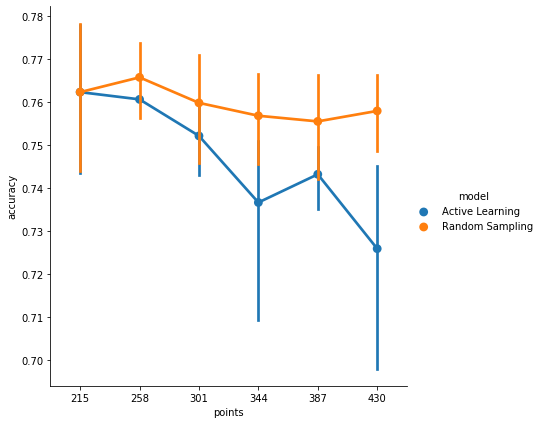

In [219]:
# As specified in question 5, 0.5% of the data (215 observations) is tagged for initial training with the following
# 215 observations, the second 0.5% of the observations, used to improve the model over 6 steps. 
# This is expressed in the below np.linspace(215, 430, 6) code segment. 
sample_counts = np.linspace(215, 430, 6).astype(int)
rf_results = run_multiple_experiments(n_exp = 10, 
                                      create_model_func = lambda : RandomForestClassifier(random_state = 0),
                    data_df = allsamples_df,
                    initial_pts = 215,
                   sample_counts = sample_counts)
sns.factorplot(x = 'points', y = 'accuracy', hue = 'model', data = rf_results, size = 6)

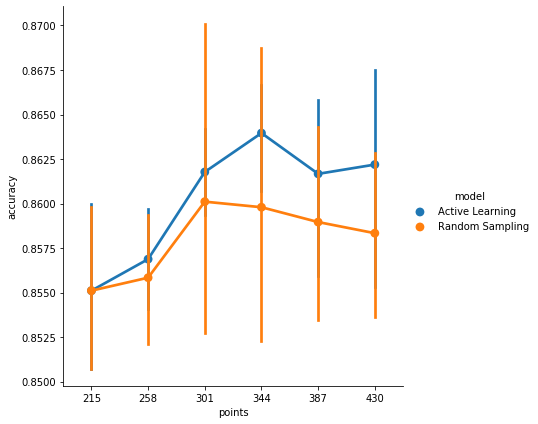

In [220]:
svm_results = run_multiple_experiments(n_exp = 6, 
                                       create_model_func=lambda :  SVC(kernel = 'rbf', probability=True, random_state=0),
                    data_df = allsamples_df,
                    initial_pts = 215,
                   sample_counts = sample_counts)
sns.factorplot(x = 'points', y = 'accuracy', hue = 'model', data = svm_results, size = 6)

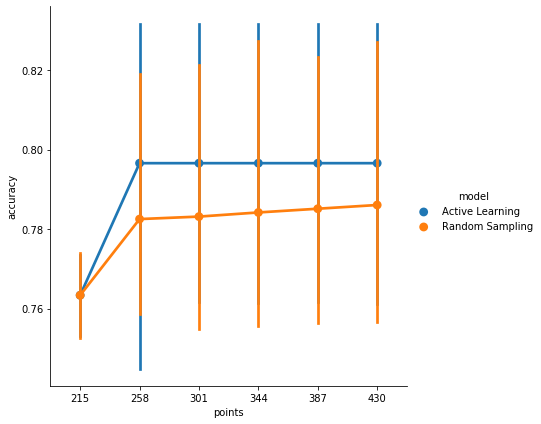

In [221]:
from sklearn.neighbors import KNeighborsClassifier
kn_results = run_multiple_experiments(n_exp = 6, 
                                      create_model_func=lambda : KNeighborsClassifier(3),
                    data_df = allsamples_df,
                    initial_pts = 215,
                   sample_counts = sample_counts)
sns.factorplot(x = 'points', y = 'accuracy', hue = 'model', data = kn_results, size = 6)

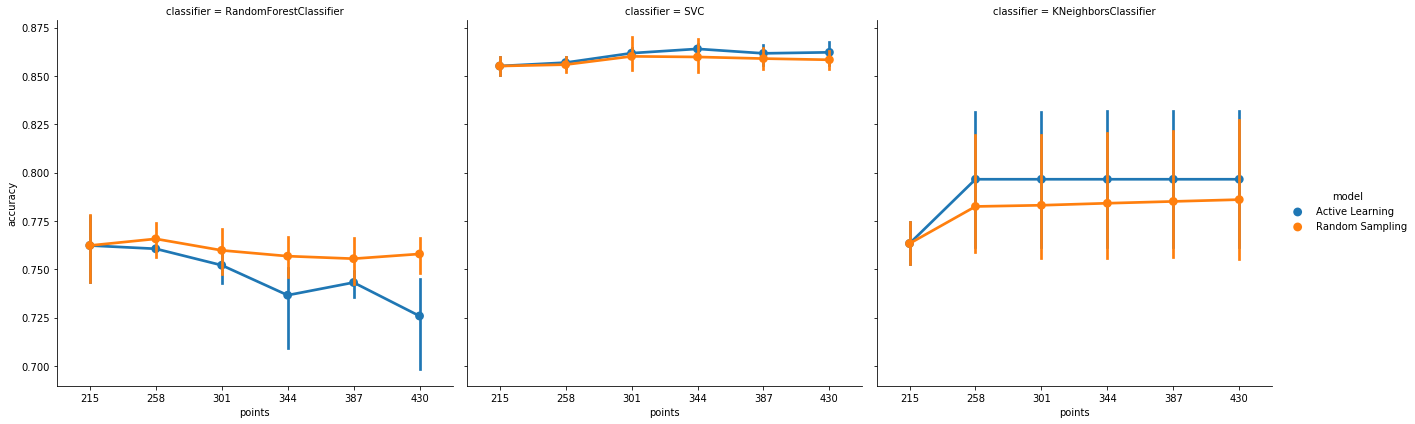

In [222]:
all_results = pd.concat([rf_results, svm_results, kn_results])
sns.factorplot(x = 'points', y = 'accuracy',
               col = 'classifier',
               hue = 'model',
               data = all_results,
               size = 6)

In [223]:
nice_results = all_results.pivot_table(values = 'accuracy', 
                        index = ['points', 'classifier'], 
                        columns = 'model').reset_index()
nice_results['Active Boost (%)'] = 100*(nice_results['Active Learning']-nice_results['Random Sampling'])/nice_results['Random Sampling']
nice_results['Active Accuracy Boost (%)'] = 100*(nice_results['Active Learning']-nice_results['Random Sampling'])
nice_results.head(5)

model,points,classifier,Active Learning,Random Sampling,Active Boost (%),Active Accuracy Boost (%)
0,215,KNeighborsClassifier,0.763333,0.763333,0.000000,0.00000
1,215,RandomForestClassifier,0.762313,0.762313,0.000000,0.00000
2,215,SVC,0.855104,0.855104,0.000000,0.00000
3,258,KNeighborsClassifier,0.796562,0.782500,1.797125,1.40625
4,258,RandomForestClassifier,0.760625,0.765750,-0.669278,-0.51250


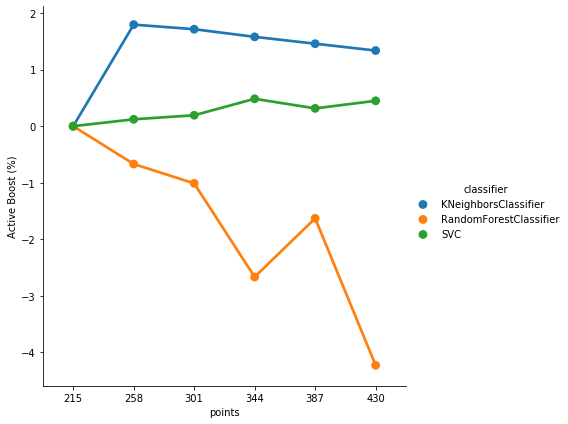

In [224]:
sns.factorplot(x='points',y='Active Boost (%)', hue='classifier', data=nice_results, size=6)

## Extra Scripts for Processing Port Data

In [192]:
# We are only using the destination ports.  Using both the source port and the destination port might inadvertently cancel
# or dampen the effect of attempting to identify ports associated with botnet traffic.  This is due to the fact that 
# many connections, most prominently TCP and ICMP, involve two-way connections that would duplicate the targeted port
# number if both the source and destination ports were included. 
df2.Destination_Port.unique()

array(['22', '20127', '443', ..., '16567', '16157', '7747'], dtype=object)

In [193]:
# The below is far too many to put into a one-hot encoded format. 
len(df2.Destination_Port.unique())

58789

In [194]:
unique_dest_ports = df2.Destination_Port.unique()

In [195]:
# Attempting to discern the total amount of ports in each category of port (well-known, registered, and ephemeral)
well_known_ports_all = []
registered_ports_all = []
ephemeral_ports_all = []
off_the_charts_all = []
not_valid_all = []

# Note that this is only counting unique ports, not the total number of ports in each category. 
for i in unique_dest_ports:
    try:
        i = int(i)
        if 0 <= int(i) <= 1023:
            well_known_ports_all.append(i)
        elif 1024 <= int(i) <= 49151:
            registered_ports_all.append(i)
        elif 49152 <= int(i) <= 65535:
            ephemeral_ports_all.append(i)
        else:
            off_the_charts_all.append(i)
    except:
        not_valid_all.append(i)
        continue
print("Well Known Ports Total: "+str(len(well_known_ports_all)))
print("Registered Ports Total: "+str(len(registered_ports_all)))
print("Ephemeral Ports Total: "+str(len(ephemeral_ports_all)))
print("Ports Not On Any Chart Total: "+str(len(off_the_charts_all)))
print("Entries Not Valid Total: "+str(len(not_valid_all)))

# From the below, only the well-known ports appear to be in the correct range to include as one-hot encoded variables. 

Well Known Ports Total: 64
Registered Ports Total: 42405
Ephemeral Ports Total: 16314
Ports Not On Any Chart Total: 0
Entries Not Valid Total: 6


In [196]:
botnet_df = df2['Destination_Port'].loc[df2['Label'].isin(['Botnet','BotnetFILTER_LEGITIMATE'])]
botnet_df.head()

4117     2243
6269     2193
8919     1038
10127    1038
11546    1038
Name: Destination_Port, dtype: object

In [197]:
# Attempting to discern the total amount of ports in each category of port (well-known, registered, and ephemeral)
# just for botnet traffic. 
well_known_ports_botnet = []
registered_ports_botnet = []
ephemeral_ports_botnet = []
off_the_charts_botnet = []
not_valid_botnet = []

# Note that this is counting the total number of ports for all observations associated with botnet traffic.
for i in botnet_df:
    try:
        i = int(i)
        if 0 <= int(i) <= 1023:
            well_known_ports_botnet.append(i)
        elif 1024 <= int(i) <= 49151:
            registered_ports_botnet.append(i)
        elif 49152 <= int(i) <= 65535:
            ephemeral_ports_botnet.append(i)
        else:
            off_the_charts_botnet.append(i)
    except:
        not_valid_botnet.append(i)
        continue
print("Well Known Ports Total: "+str(len(well_known_ports_botnet)))
print("Registered Ports Total: "+str(len(registered_ports_botnet)))
print("Ephemeral Ports Total: "+str(len(ephemeral_ports_botnet)))
print("Ports Not On Any Chart Total: "+str(len(off_the_charts_botnet)))
print("Entries Not Valid Total: "+str(len(not_valid_botnet)))

# From the below, botnet traffic appears to take on a mix of well-known, registered, and ephemeral ports.  
# I think that just using well-known ports, for simplicity and given our limited resources, is fine for training. 

Well Known Ports Total: 12647
Registered Ports Total: 8195
Ephemeral Ports Total: 864
Ports Not On Any Chart Total: 0
Entries Not Valid Total: 54
